# Project and Data Overview

 In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

![exit](https://www.aihr.com/wp-content/uploads/Job-Dissatisfaction-cover-1000x523-1.png)

# Business Problem

- Are the employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?<br><br>
- If a dissatisfaction is present, how does it vary within the different age groups at the institute?<br><br>


# Data Dictionary

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey<br><br>
- `SperationType` : The reason why the person's employment ended<br><br>
- `Cease Date` : The year or month the person's employment ended<br><br>
- `DETE Start Date` : The year the person began employment with the DETE<br><br>

Below is a preview of couple columns we'll work with from the `tafe_survey.csv`

- `Record ID` : an id used to identify the participant of the survey<br><br>
- `Reason for ceasing employment` : The reason why the person's employment ended<br><br>
- `LengthofServiceOverall Overall` : Length of Service at Institute (in years): The length of the person's employment (in years)

## LIBRARIES 

We will start by importing NumPy and Pandas for performing mathematical operation and manipulating data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data sets
Reading in and explore the Data sets:

In [2]:
# read the DETE dataset
dete_survey = pd.read_csv('dete_survey.csv')
#read the TAFE dataset
tafe_survey = pd.read_csv('tafe_survey.csv')

# Previewing DETE data set:

In [3]:
#preview DETE dataset
pd.set_option("display.max_columns", None)
dete_survey.info()
dete_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,800,742,788,733,761,806,765,794,795,788,760,754,785,710,794,605,735,605,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [6]:
dete_survey['Professional Development'].value_counts()

A     413
SA    184
N     103
D      60
SD     33
M      15
Name: Professional Development, dtype: int64

In [7]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

## Initial Notes
- The dataset comprises 822 rows and 56 columns.
- The column names do not conform to the recommended python snake case convention. Infact, the naming convention here appears inconsistent.
- 32 of the 56 columns contain missing data. Columns like Classification, Business Unit, Aboriginal, Torres Strait, South Sea, Disability and NESB have over 50% missing data.
- 18 of the 56 columns are stored as boolean data types. Only the ID column is stored as an integer. Other columns are stored as object/string data.
- Time data (Cease Date, DETE Start Date and Role Start Date) are stored as object/string data instead of datetime or numerical data.

## Additional Notes

- The most frequent reason for employee exit from DETE appears to be age retirement, as seen in the SeparationType column.
- Most of the respondents are 61 or older. This may further support age retirement as the most common reason for exit.
- The Start Date and Role Start Date columns contain alot of 'Not Stated' entries. There could be a chance that this information wasn't provided by respondents at the time of completing the survey.
- The last five columns, Aboriginal, Torres Strait, South Sea, Disability and NESB have only one unique value which is 'Yes'. This might explain why they have the highest proportion of null values. Null entries in these columns might have represented 'No' at the time the survey was administered.
- The most common entry from the Professional Development column to the Health & Safety column is 'A'. This seems quite unusual as 'A' doesn't seem to represent anything. We will explore these columns further.


In [8]:
def count_value(col):
    return col.value_counts()

range = dete_survey.iloc[:, 28:49]

range.apply(count_value)

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
A,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386
D,60,83,112,77,61,107,95,77,37,34,59,65,108,78,77,76,52,45,60,105,50
M,15,24,13,14,15,12,14,12,11,13,11,22,17,15,13,8,10,11,10,33,28
N,103,230,158,160,99,116,168,120,95,95,94,141,183,138,179,129,116,120,130,225,153
SA,184,100,121,115,148,162,124,179,243,244,228,157,130,156,149,144,177,165,162,78,141
SD,33,56,77,65,27,59,67,76,25,31,47,37,62,57,57,58,57,39,50,72,35


## Observation: 

- From Professional Development to Health & Safety, there are 6 unique values: A, D, M,N, SA, SD.
- These may be aliases for the infamous survey options: `Strongly Agree (SA), Moderately agree (M), Agree (A), Neutral (N), Disagree (D) and Strongly Disagree (SD)`. Of these options, Agree (A) seems to be the most commonly selected option.

# Previewing TAFE data set:

In [9]:
tafe_survey.info()
tafe_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [10]:
## one columns has alot of missing values, counting isnull
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].isnull().sum()

589

## Notes

- The column names in the TAFE survey are too wordy, which makes them hard to work with. They do not follow the python snake case convention.
- The dataset comprises 702 rows and 72 columns.
- Missing values comprise 84% of the entries in the 'Main Factor. Which of these was the main factor for leaving?' columns.
- 70 of the 72 columns are stored as object/string data. Only the Record ID and CESSATION YEAR columns are stored as float types.
- Although they bear different names, some of the columns are similar to the DETE dataset. Examples include the CESSATION YEAR, Reason for ceasing employment, Gender, CurrentAge, and EmploymentType.

In [11]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Additional Notes from the TAFE survey
- Some Contributing factors are recorded as "-". This might be a placeholder indicating that no answer was provided at the time ths survey was administered.
- Institute and WorkUnit related questions have six unique values namely: "Agree", "Neutral", "Strongly Agree", "Disagree", "Strongly Disagree" and "Not Applicable". Similar to the DETE survey, the most common entry in each of these columns is "Agree".
- The column Main Factor. Which of these was the main factor for leaving? shows that the most frequent reason for employee exit is dissatisfaction. This column has over 80% missing entries.
- The CurrentAge column contains several age bins. Most respondents are 56 years or older.
<br><br>
Both the dete_survey and tafe_survey datasets contain many columns that we wont be needing to answer our stakeholder questions.
<br><br>

## Conclusions From Initial Exploration
- The dete_survey data contains 'Not Stated' values that indicate values are missing, they should be represented as NaN.
- Both surveys contain many similar columns, but the names are different.
- There are many columns we wont be needing for our analysis.
- In the tafe_survey there are many responses that point to resignation caused by dissatisfaction.


## Data Cleaning

- replacing 'not stated' with NaN
- drop unnecessary columns
- rename columns header

### 1) Replacing 'not stated' with Nan to better indicate missing values

In [12]:
# reading the dete_survey.csv again but replace all 'not stated' with Nan
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### 2) Dropping columns that are not significant for this project

In [13]:
# Dropping unnecessary columns from dete_survey and tafe_survey
# renaming them to dete_updated and tafe_updated
dete_col_to_drop = dete_survey.columns[28:49]
tafe_col_to_drop = tafe_survey.columns[17:66]

dete_updated = dete_survey.drop(dete_col_to_drop, axis = 1)
tafe_updated = tafe_survey.drop(tafe_col_to_drop, axis = 1)

In [14]:
print('DETE survey now has ' + format(dete_updated.shape[1]) + ' columns and ' 
      + format(dete_updated.shape[0]) + ' rows')
print('TAFE survey now has ' + format(tafe_updated.shape[1]) + ' columns and '
      + format(tafe_updated.shape[0]) + ' rows')

DETE survey now has 35 columns and 822 rows
TAFE survey now has 23 columns and 702 rows


### 3) Cleaning column names
- standardize the format (snake_case)
- some columns in tafe are the same but named differently, we will rename those columns names in tafe to match dete so that we will be able to combine these two data set for analysis.
- for example :


| dete_survey's column | tafe_survey's column | Definition |
|---|---|---|
| ID | Record ID | An id used to identify the participant of the survey|
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended|
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |


In [15]:
## snake_case for dete column names
dete_updated.columns = (dete_updated.columns.str.lower()
                            .str.replace('separationtype', 'separation_type')
                            .str.replace(' ', '_')
                            .str.replace('/', '_')
                            .str.strip()
                       )

dete_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
## renaming tafe column names
### create a dictionary for the renaming
renamingcols = {
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
                }
    
tafe_updated.rename(renamingcols, axis = 1, inplace = True)               

tafe_updated.head(3)

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


### 4) Filtering

Because the question we are trying to answer is about employee who resigned, therefore we will focus on rows that has 'resignation' under the 'separation_type' column.

In [17]:
dete_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [18]:
tafe_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

We can see multiple uses of the word in the different seperation types:

- `Resignation`

- `Resignation-Other reasons`

- `Resignation-Other employer`

- `Resignation-Move overseas/interstate`

We have to account for each of these variations so we don't unintentionally drop useful data.

In [19]:
## slicing out all rows with any kind of resignation in the dete data under separation_type
dete_resign = dete_updated[dete_updated['separation_type']
                                .str.startswith('Resignation')].copy()

## slicing out all rows that says resignation in the dete data under separation_type
tafe_resign = tafe_updated[tafe_updated['separation_type']
                                == 'Resignation'].copy()

In [20]:
dete_resign['cease_date'].describe()

count      300
unique      16
top       2012
freq       126
Name: cease_date, dtype: object

In [21]:
dete_resign['separation_type'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

In [22]:
tafe_resign['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

### 5) Reviewing date columns

cease_date columns from dete data set

In [23]:
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [24]:
## splitting text by '/' and extract the last "word" to get year and convert them to floats

dete_resign['cease_date'] = dete_resign['cease_date'].str.split('/').str[-1].astype('float')

In [25]:
dete_resign['cease_date'].value_counts().sort_index(ascending = False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

'dete_start_date' columns from dete data set, everything looks fine at this point

In [26]:
dete_resign['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

'cease_date' columns from tafe data set, it looks normal at this point

In [27]:
tafe_resign['cease_date'].value_counts().sort_index(ascending = False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

#### Getting some insights from dates columns

In [28]:
%matplotlib inline

,cease_date,dete_start_date
count,300.00000,283.000000
mean,2012.60000,2002.067138
std,0.75403,9.914479
min,2006.00000,1963.000000
25%,2012.00000,1997.000000
50%,2013.00000,2005.000000
75%,2013.00000,2010.000000
max,2014.00000,2013.000000


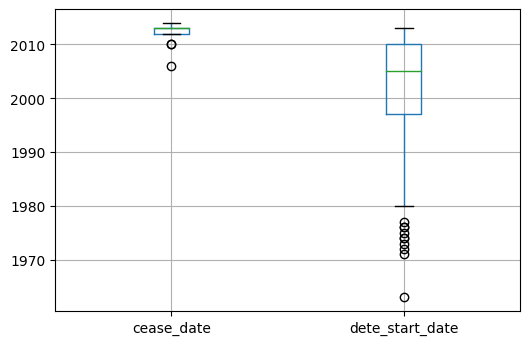

In [29]:
## drawing boxplot for cease_date and dete_start_date to show stats
dete_resign.boxplot(column = ['cease_date','dete_start_date'])
dete_resign[['cease_date', 'dete_start_date']].describe()

### 6) Creating a new column ('year_of_service') in dete_resign to show the years of service for each individual

#### Then we will show some tables and chart for later exploration

taking a look at the turnover of staff within DETE

In [30]:
dete_resign['institute_service'] = dete_resign['cease_date'] - dete_resign['dete_start_date']

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

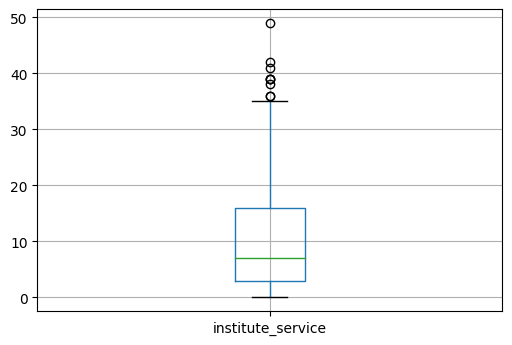

In [31]:
## drawing boxplot to describe the column ('years_of_service')
dete_resign.boxplot(column = ['institute_service'])
dete_resign['institute_service'].describe()

Text(0, 0.5, 'Frequency')

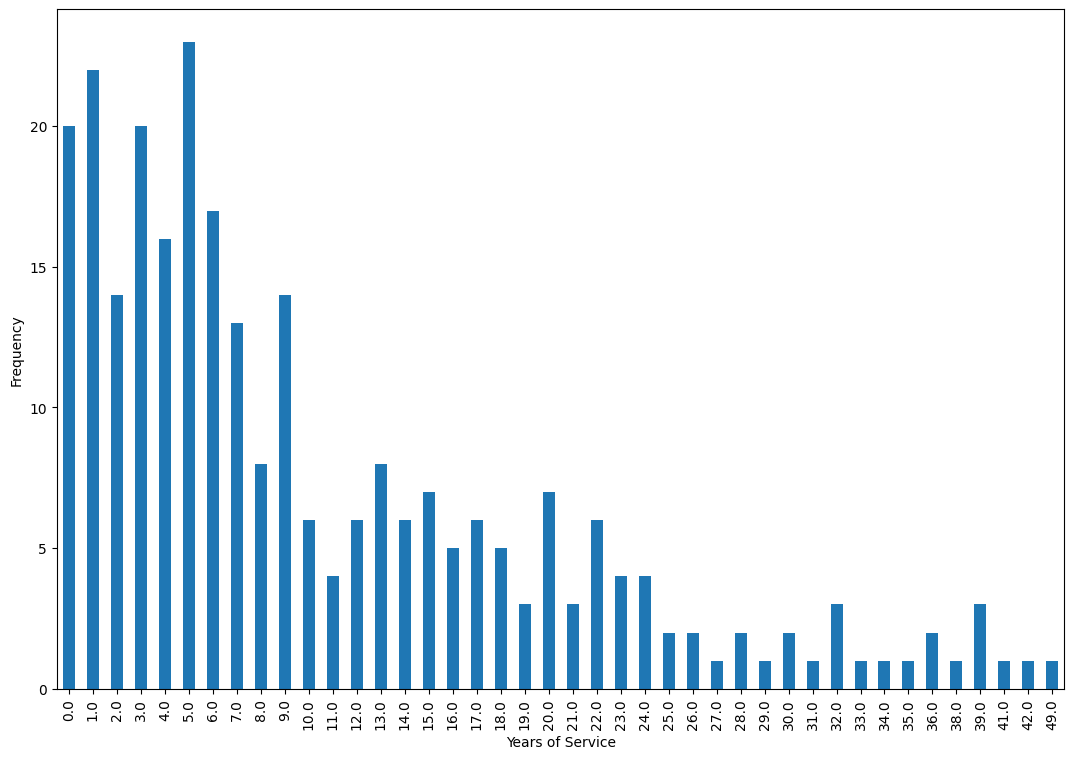

In [32]:
dete_resign['institute_service'].value_counts().sort_index().plot(kind='bar', figsize = (13,9))
plt.xlabel("Years of Service")
plt.ylabel("Frequency")

#### 50 percent of employee quit within 7 years at DETE

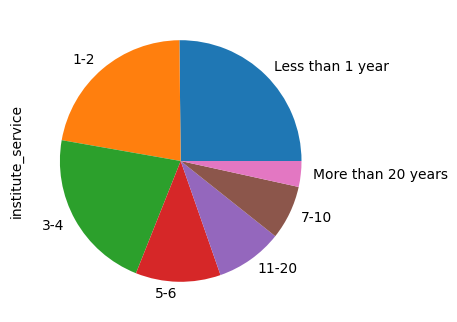

In [33]:
tafe_resign['institute_service'].value_counts().plot(kind = 'pie')

#### Almost 50 percent of employee quit without 2 years at TAFE

### 7) Finding Dissatisfied Employee in DETE and TAFE

Now, we will try to identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to make this assessment:

TAFE

- `Contributing Factors. Dissatisfaction`

- `Contributing Factors. Job Dissatisfaction`

DETE

- `job_dissatisfaction`

- `dissatisfaction_with_the_department`

- `physical_work_environment`

- `lack_of_recognition`

- `lack_of_job_security`

- `work_location`

- `employment_conditions`

- `work_life_balance`

- `workload`

If an employee indicated that any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the dissatisfied column will contain just the following values:

- `True`: indicates a person resigned because they were dissatisfied with the job

- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job

#### Starting with DETE dataset

In [34]:
dissatisfied_dete = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']

In [35]:
## value_counts all columns listed in 'dissatisfied_dete'
dete_dissatisfied_sum = dete_resign[dissatisfied_dete].apply(pd.Series.value_counts)

In [36]:
dete_dissatisfied_sum

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


##### * All values in DETE dataset appear to be already in either True or False
<br>

#### We will create a new column that show "True" if surveyee had answered True to any of the dissatisfaction questions.  False if none of the answers were True

In [37]:
dete_resign['dissatisfied'] = dete_resign[dissatisfied_dete].any(axis=1, skipna=False)
dete_resign_up = dete_resign.copy()

Number of dissatisfied employee in DETE
False    162
True     149
Name: dissatisfied, dtype: int64


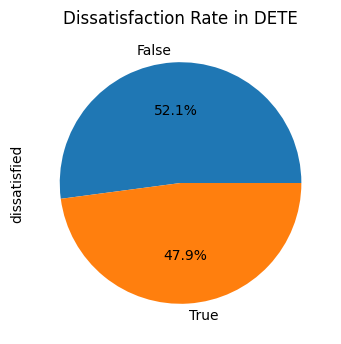

In [38]:
chart_dete_dissatisfied = dete_resign_up['dissatisfied'].value_counts(dropna = False)
print('Number of dissatisfied employee in DETE')
print(chart_dete_dissatisfied)
chart_dete_dissatisfied.plot(kind = 'pie', autopct='%1.1f%%', title = 'Dissatisfaction Rate in DETE')

### Conlusion: About 48 percent of staff in DETE answered True to at least one of the dissatisfaction question

####  We now moving to TAFE data set

In [39]:
dissatisfied_tafe = [
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]

In [40]:
tafe_dissatisfied_sum0 = tafe_resign[dissatisfied_tafe].apply(pd.Series.value_counts)
tafe_dissatisfied_sum0

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
-,277.0,270.0
Contributing Factors. Dissatisfaction,55.0,NaN
Job Dissatisfaction,NaN,62.0


#### Converting survey's answer into simple TRUE or FALSES

In [41]:
def update_vals(x):
    if x == '-':          ## if survey answer is - then change to FALSE
        return False
    elif pd.isnull(x):    ## if null then stay NaN
        return np.nan
    else:
        return True       ## everything else is TRUE

In [42]:
## mapping the update_vals function into tafe column
for y in dissatisfied_tafe:
    tafe_resign[y] = tafe_resign[y].map(update_vals)

In [43]:
tafe_resign[dissatisfied_tafe]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


In [44]:
tafe_resign['dissatisfied'] = tafe_resign[dissatisfied_tafe].any(axis=1, skipna=False)
tafe_resign_up = tafe_resign.copy()

Number of dissatisfied employee in TAFE
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


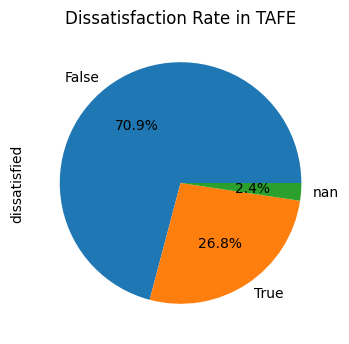

In [45]:
chart_tafe_dissatisfied = tafe_resign_up['dissatisfied'].value_counts(dropna=False)
print('Number of dissatisfied employee in TAFE')
print(chart_tafe_dissatisfied)
chart_tafe_dissatisfied.plot(kind = 'pie', autopct='%1.1f%%', title = 'Dissatisfaction Rate in TAFE')

### Conclusion: About 27 percent of staff in TAFE answered True to at least one of the dissatisfaction question and  2.5 percent didn't provide an answer

### 8) Combining the two Dataset

In [46]:
## adding a column that indicate which data set the data is coming from (dete or tafe)
dete_resign_up['institute'] = 'DETE'
tafe_resign_up['institute'] = 'TAFE'

In [47]:
# Combining the two dataset
combined = pd.concat([dete_resign_up, tafe_resign_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study_travel                                           311
relocation                                             3

#### we will drop all columns that has too many null values

In [48]:
## dropping all column that has less than 500 non null value
combined_update = combined.dropna(thresh = 500, axis = 1).copy()

In [49]:
combined_update.head(5)

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


### 9) Cleaning up the Institute_service column

#### recall that the values under institute service have different format between DETE and TAFE, we will format them all into numbers.

In [50]:
combined_update['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [51]:
## a pattern that will extract one or more digit from a string
pattern = r'(\d+)' 

## change whole column into string so we can extract info using the above pattern
## then change it back to float
combined_update['institute_service_up'] = combined_update['institute_service'].astype('str').str.extract(pattern).astype('float')

combined_update['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

#### Grouping them into category for future analysis

In [52]:
## grouping years of services into category
## < 3 is new
## >= 3 and <= 6 is experienced
## >=7 and <= 10 is established
## >= 11 is veteran

def group_by_years(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return "new"
    elif (x >= 3 and x <= 6):
        return "Experienced"
    elif (x >= 7 and x <= 10):
        return "Established"
    elif (x >= 11):
        return "Veteran"
    else:
        return "error"

In [53]:
combined_update['service_cat'] = combined_update['institute_service_up'].apply(group_by_years)

In [54]:
combined_update['service_cat'].value_counts()

new            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### 10) Cleaning up the age column

In [55]:
combined_update['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [56]:
## cleaning up age column 
## all value are in group with an interval of 5 years but in different format
## we will extract first number then concatenate it a plus 4 number
combined_update['age_group'] = combined_update['age'].astype('str').str.extract(r'(\d+)').astype('float')
coly = combined_update['age_group'] + 4
combined_update['age_group'] = combined_update['age_group'].astype('str') + " - " + coly.astype('str')
combined_update['age_group'] = combined_update['age_group'].replace('20.0 - 24.0', '20 or yonger').replace('61.0 - 65.0', '61 or older')


In [63]:
combined_update['age_group'].value_counts().sort_index()

20 or yonger    10
21.0 - 25.0     62
26.0 - 30.0     67
31.0 - 35.0     61
36.0 - 40.0     73
41.0 - 45.0     93
46.0 - 50.0     81
51.0 - 55.0     71
56.0 - 60.0     55
61 or older     23
nan - nan       55
Name: age_group, dtype: int64

### 11) Cleaning up the dissatisfied column

In [58]:
combined_update['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [59]:
combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(False)

In [60]:
combined_update['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

### 12) Plotting chart for analysis

Text(0.5, 0, ' ')

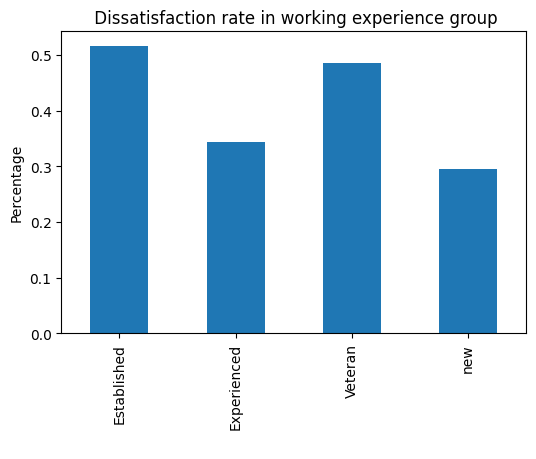

In [61]:
## creating a pivot table for service_cat then plot a chart against dissatisfied column

pvt_dissatisfied_service_cat = combined_update.pivot_table(values = 'dissatisfied', index = 'service_cat')
pvt_dissatisfied_service_cat.plot(kind = 'bar', title = ' Dissatisfaction rate in working experience group', legend = False)
plt.ylabel('Percentage')
plt.xlabel(' ')

Text(0, 0.5, 'Percentage')

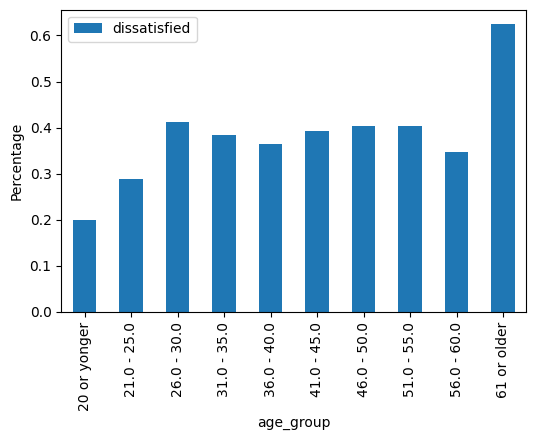

In [62]:
## Creating a pivot table for age group against the dissatisfied column 

combined_update.dropna().pivot_table(values = 'dissatisfied', index = 'age_group').plot(kind = 'bar')
plt.ylabel('Percentage')

## Final Observations:
The following bar plot indicates all experience levels are dissatisfied within the range of about 30-50%. The most dissatisfied group—based on service time is the Established group (~ 51%). The Veteran group (followed very closely by the New group) are second most dissatisfied (~ 50%). The least dissatisfied was the Experienced group (~ 30%).  As for age group, 61 and order has the higher dissatisfaction rate at around 62% while 20 and younger has the lowest rate at around 20%.